# Machine Learning - lab 2 
## Linear regression
### Adam Stasiak 

Library import

In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 



## Linear regression with one variable

Ex. 1

In [538]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [539]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [540]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Ex. 2

Text(0.5, 0, 'Population of City in 10.0000s')

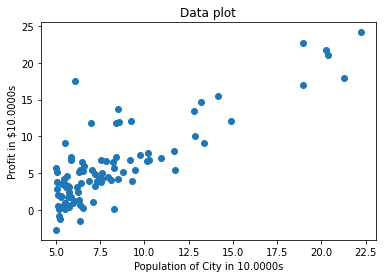

In [541]:
x = data.values[:,0]
y = data.values[:,1]

plt.scatter(x,y)
plt.title("Data plot")
plt.ylabel("Profit in $10.0000s")
plt.xlabel("Population of City in 10.0000s")

Ex.3 and Ex.4

In [542]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)
# print(X)
# print(y)

In [543]:
print(X.shape)
print(y.shape)
print(theta.shape)

(2, 97)
(1, 97)
(2, 1)


In [544]:
def hipothesis(X,theta):
    h = np.transpose(theta)@X
    return h


In [545]:
h = hipothesis(X,theta)
print(h.shape)
print(y.shape[1])

(1, 97)
97


Ex. 5

In [546]:
def computeCost(X,y,theta):
    h = hipothesis(X,theta)
    m = y.shape[1]
    J_theta = np.float64(np.sum((h-y)**2)/(2*m)) 
    return J_theta

Ex.6

In [547]:
J = computeCost(X,y,theta)
print(J)

32.072733877455676


Ex. 7

In [ ]:
def simple_gradient(X, y, theta, alpha, it):
    theta = np.float64(theta)
    cost = []
    cost.append(computeCost(X,y,theta))
    m = X.shape[1]
    for i in range(it):
        theta = (theta - alpha * (np.transpose((hipothesis(X,theta)-y)@X.T))/m)
        cost.append(computeCost(X,y,theta))

    return theta,cost

Ex.8 and Ex.9

In [549]:
alpha = 0.01
it = 1000

In [550]:
theta_opt, cost = simple_gradient(X,y,theta,alpha,it)

In [551]:
print(cost[-1])

4.515955503078913


In [552]:
print(theta_opt)

[[-3.24140214]
 [ 1.1272942 ]]


Ex.10

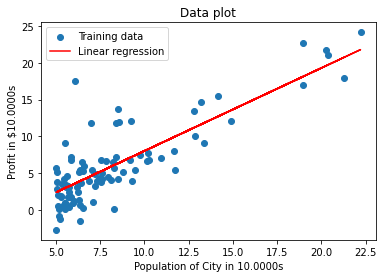

In [553]:
h_opt_1 = hipothesis(X,theta_opt)

plt.scatter(x,y,label='Training data')
plt.plot(x,h_opt_1[0],color='red',label='Linear regression')
plt.title("Data plot")
plt.ylabel("Profit in $10.0000s")
plt.xlabel("Population of City in 10.0000s")
plt.legend()
plt.show()

Ex. 11

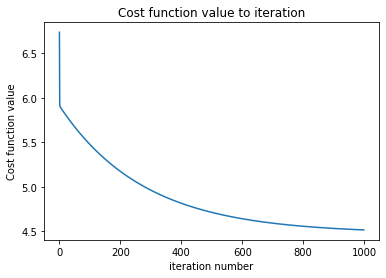

In [554]:
iteration = np.arange(0,it)
plt.plot(iteration,cost[1:])
plt.title("Cost function value to iteration")
plt.ylabel("Cost function value")
plt.xlabel("iteration number")
plt.show()

## Linear regression with multiple variables

In [555]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [556]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [557]:
x1 = data2.values[:,0]
x2 = data2.values[:,1]
y = data2.values[:,2]
print(x1.shape)

(47,)


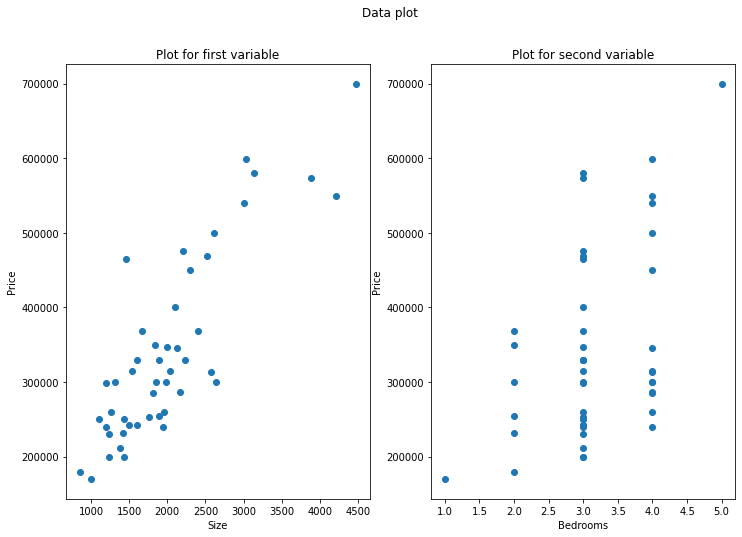

In [558]:
figure, ax = plt.subplots(1,2,figsize=(12,8))
figure.suptitle('Data plot')
ax[0].scatter(x1,y)
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Price')
ax[0].set_title("Plot for first variable")
ax[1].scatter(x2,y)
ax[1].set_xlabel('Bedrooms')
ax[1].set_ylabel('Price')
ax[1].set_title("Plot for second variable")
plt.show()


Ex.1

In [559]:
def normalization(x):
    x_norm = []
    for i in range(len(x)):
        x_norm.append((x[i]-np.mean(x))/np.std(x))
    return np.array(x_norm)

In [560]:
x1_norm = normalization(x1)
x2_norm = normalization(x2)

Ex.3

In [561]:
X = np.stack([np.ones(x1.shape, dtype=np.float64), x1_norm,x2_norm], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float64)

In [562]:
print(X.shape)
print(y.shape)
print(theta.shape)

(3, 47)
(1, 47)
(3, 1)


In [563]:
h = hipothesis(X,theta)
print(h.shape)

(1, 47)


In [564]:
J = computeCost(X,y,theta)
print(J)

65591548106.45744


In [565]:
alpha = 0.01
it = 10000
theta_opt, cost = simple_gradient(X,y,theta,alpha,it)

In [566]:
print(theta_opt)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [567]:
print(cost[-1])

2043280050.6028287


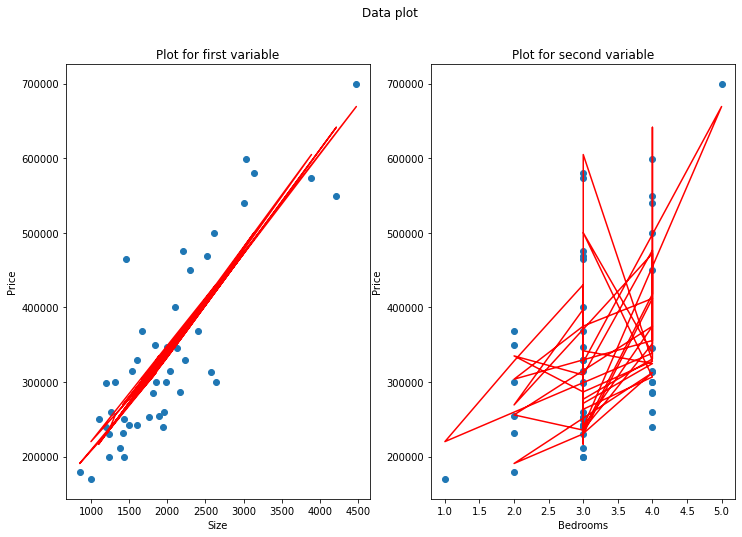

In [568]:
h_opt_2 = hipothesis(X,theta_opt)
# print(h_opt.shape)
# print(h_opt) 
figure, ax = plt.subplots(1,2,figsize=(12,8))
figure.suptitle('Data plot')
ax[0].scatter(x1,y)
ax[0].plot(x1,h_opt_2[0],color = 'red')
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Price')
ax[0].set_title("Plot for first variable")
ax[1].scatter(x2,y)
ax[1].plot(x2,h_opt_2[0],color = 'red')
ax[1].set_xlabel('Bedrooms')
ax[1].set_ylabel('Price')
ax[1].set_title("Plot for second variable")
plt.show()

## Linear regression - Python packages 

In [569]:
import sklearn.linear_model as sklm
import sklearn.model_selection as skms



In [570]:
x = data.values[:,0]
y = data.values[:,1]

X_train,X_test,y_train,y_test = skms.train_test_split(x,y,test_size = 0.3,shuffle=True)
lreg = sklm.LinearRegression(fit_intercept=True,copy_X = True ).fit(X_train[:,None],y_train)
Y_predicted = lreg.predict(X_test [:,None])

# Regression coefficients (theta)
print('Coefficients: \n', lreg.coef_)
 
#  Residual sum of squares error
error = np.mean((Y_predicted - y_test) ** 2)
print("Residual sum of squares: {}".format(error))


Coefficients: 
 [1.24137632]
Residual sum of squares: 17.485775994354928


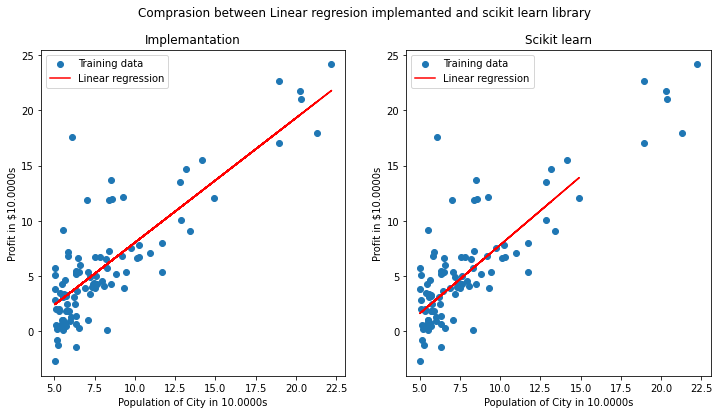

In [571]:
figure, ax = plt.subplots(1,2,figsize=(12,6))
figure.suptitle('Comprasion between Linear regresion implemanted and scikit learn library')
ax[0].scatter(x,y,label='Training data')
ax[0].plot(x,h_opt_1[0],color='red',label='Linear regression')
ax[0].set_title("Implemantation")
ax[0].set_ylabel("Profit in $10.0000s")
ax[0].set_xlabel("Population of City in 10.0000s")
ax[0].legend()
ax[1].scatter(x,y,label='Training data')
ax[1].plot(X_test,Y_predicted,color='red',label='Linear regression')
ax[1].set_title("Scikit learn")
ax[1].set_ylabel("Profit in $10.0000s")
ax[1].set_xlabel("Population of City in 10.0000s")
ax[1].legend()
plt.show()

In [572]:
x1 = data2.values[:,0]
x2 = data2.values[:,1]
y = data2.values[:,2]

x1_norm = normalization(x1)
x2_norm = normalization(x2)

In [573]:
X = np.transpose(np.array([x1_norm,x2_norm]))
X_train,X_test,y_train,y_test = skms.train_test_split(X,y,test_size = 0.3,shuffle=True)
lreg = sklm.LinearRegression(fit_intercept=True,copy_X = True ).fit(X_train,y_train)
Y_predicted = lreg.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', lreg.coef_)
 
#  Residual sum of squares error
error = np.mean((Y_predicted - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [122547.04582001 -14610.96289969]
Residual sum of squares: 7431688250.884238


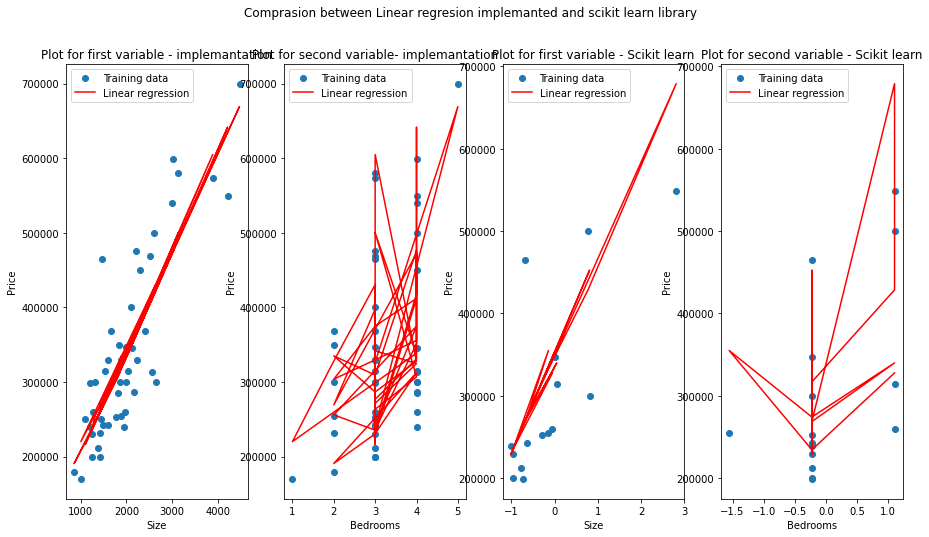

In [574]:
figure, ax = plt.subplots(1,4,figsize=(15,8))
figure.suptitle('Comprasion between Linear regresion implemanted and scikit learn library')
ax[0].scatter(x1,y,label='Training data')
ax[0].plot(x1,h_opt_2[0],color = 'red',label='Linear regression')
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Price')
ax[0].set_title("Plot for first variable - implemantation")
ax[0].legend()
ax[1].scatter(x2,y,label='Training data')
ax[1].plot(x2,h_opt_2[0],color = 'red',label='Linear regression')
ax[1].set_xlabel('Bedrooms')
ax[1].set_ylabel('Price')
ax[1].set_title("Plot for second variable- implemantation")
ax[1].legend()
ax[2].scatter(X_test[:,0],y_test,label='Training data')
ax[2].plot(X_test[:,0],Y_predicted,color = 'red',label='Linear regression')
ax[2].set_xlabel('Size')
ax[2].set_ylabel('Price')
ax[2].set_title("Plot for first variable - Scikit learn")
ax[2].legend()
ax[3].scatter(X_test[:,1],y_test,label='Training data')
ax[3].plot(X_test[:,1],Y_predicted,color = 'red',label='Linear regression')
ax[3].set_xlabel('Bedrooms')
ax[3].set_ylabel('Price')
ax[3].set_title("Plot for second variable - Scikit learn")
ax[3].legend()
plt.show()